In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import os.path
from scipy import signal as sg

import h5py 

In [63]:
#Sess = 'Bl6_177_2020-02-29_17-12-05'
#Sess = 'Bl6_177_2020-02-27_14-36-07'
Sess = 'Bl6_177_2020-03-01_14-49-02'

#filename_video = 'Bl6_177_200227_0001DLC_resnet50_Pupils_NPxApr22shuffle1_300000.csv'
filename_video = 'Bl6_177_200301_0001DLC_resnet50_Pupils_NPxApr22shuffle1_300000.csv'

sr = 30000
wd = os.path.join('/gs/projects/OWVinckNatIm/NPx_recordings/', Sess)


In [19]:
wd_cont = wd + '/experiment1/recording1/continuous/Rhythm_FPGA-102.0/'
print(wd_cont)

cont_ts = np.load(os.path.join(wd_cont, "timestamps.npy"))
ts_first = cont_ts[0]

del cont_ts

/gs/projects/OWVinckNatIm/NPx_recordings/Bl6_177_2020-03-01_14-49-02/experiment1/recording1/continuous/Rhythm_FPGA-102.0/


In [64]:
ts_first = 194816 #'Bl6_177_2020-03-01_14-49-02'

#ts_first = 6354944 #'Bl6_177_2020-02-27_14-36-07'

In [65]:
wd_events = wd + '/experiment1/recording1/events/Rhythm_FPGA-102.0/TTL_1/'

sr = 30000
print('First timestamp is', ts_first)

#channels = np.load(os.path.join(wd, "channels.npy"))
channel_states = np.load(os.path.join(wd_events, "channel_states.npy"))
ts = np.load(os.path.join(wd_events, "timestamps.npy"))
ts = ts - ts_first



camera_ind = [channel_states == 1][0]
camera_time = ts[camera_ind]/sr

print(len(camera_time), 'timestamps total')

First timestamp is 194816
181513 timestamps total


In [69]:
diff = camera_time[1:] - camera_time[:-1]
val = diff[diff > 0.05]

print(val)

# ptint indices of these values
for i in range(len(val)):
    print(np.where(diff == val[i])[0][0])


print('There are ', (181507 - 71), 'timestamps')

camera_time_cont = camera_time[np.where(diff == val[1])[0][0]:np.where(diff == val[2])[0][0]]

[0.3432     0.19556667 0.1956    ]
55
71
181507
There are  181436 timestamps


181436

In [70]:
pupil_folder = '/mnt/gs/home/slashchevam/DeepLC/pupils_NPx/Pupils_NPx-slashchevam-2020-04-22/videos/'
os.chdir(pupil_folder)

pupil_table = pd.read_csv(os.path.join(pupil_folder, filename_video),  
                          sep=",", 
                          index_col=False)

pupil_table = pupil_table[2:]
pupil_table.columns = ['ind', 
                       'upx', 'upy', 'upscore', 
                       'rightx', 'righty', 'rightscore', 
                       'downx', 'downy', 'downscore', 
                       'leftx', 'lefty', 'leftscore']

pupil_table = pupil_table.astype('float')
print(len(pupil_table))

181405


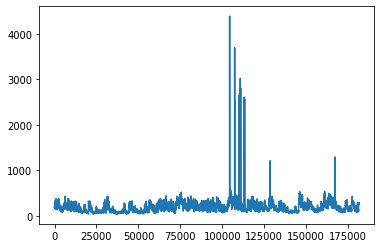

In [95]:

# Adjust manually for your data
kernel = 15 # must be odd

w = np.abs(pupil_table['rightx'] - pupil_table['leftx'])
#plt.plot(w)
w_medianf = sg.medfilt(w, kernel_size = kernel)
#plt.plot(w_medianf)

h = np.abs(pupil_table['upy'] - pupil_table['downy'])
#plt.plot(h)
h_medianf = sg.medfilt(h, kernel_size = kernel)
#plt.plot(h_medianf)

av_rad = (w_medianf + h_medianf)/4
pupil_area = np.pi * av_rad**2

plt.plot(pupil_area)



number of value exceeding 5 std after filtering: 141


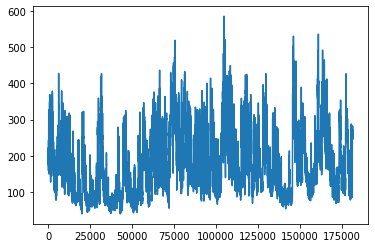

In [96]:
print("number of value exceeding 5 std after filtering:", 
      len(pupil_area[pupil_area > np.mean(pupil_area) + 5*np.std(pupil_area)]))

pupil_area_cor = pupil_area

pupil_area_cor[pupil_area_cor > np.mean(pupil_area_cor) + 5*np.std(pupil_area_cor)] = np.mean(pupil_area_cor)

# %%

#pupil_export = {'time': camera_time_cont[0:len(pupil_area)], 'pupil_area': pupil_area}
#pupil_area_df = pd.DataFrame(pupil_export, columns=['time', 'pupil_area'])

#name = Sess + '_pupil.csv'
#pupil_area_df.to_csv(name, index=False)

plt.plot(pupil_area_cor)


# %%

pupil_export = {'time': camera_time_cont[0:len(pupil_area_cor)], 'pupil_area': pupil_area_cor}
pupil_area_df = pd.DataFrame(pupil_export, columns=['time', 'pupil_area'])

name = Sess + '_pupil.csv'
pupil_area_df.to_csv(name, index=False)

In [97]:
pwd()

'/mnt/pns/home/slashchevam/DeepLC/pupils_NPx/Pupils_NPx-slashchevam-2020-04-22/videos'